# Education Key Performance Indicator Analysis

***
<pre>
Name: Tenicka Norwood
</pre>

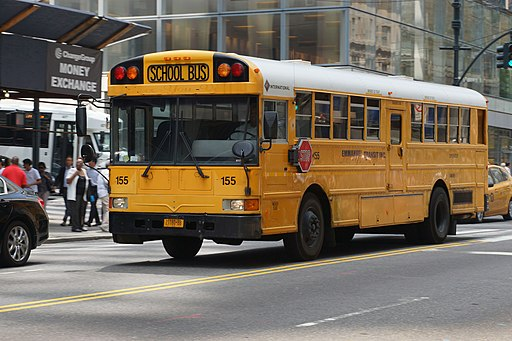
(Source:Wikimedia Commons [https://commons.wikimedia.org/)]

# Digging into Data after Joining Flatiron
***

Now before I start exploring data, I look at:
* How clean is it?
* How was it collected?
* What license is it available under?

I have learned that importing libraries and visualization packages allows me to be more effective in crafting insights, because my code can access other tools, projects become both more manageable and more impactful. 

My favorite libraries and visualization packages so far include: 
* <code> sqlite3 </code>: a library that allows accessing and manipulating databases
* <code> pandas </code>: a data analysis and manipulation library that allows flexible reshaping of dataframes
* <code> seaborn </code>: a data visualization library based on matplot lib

Right now, I am looking at data from: 

* [The New York State Education Department](https://data.nysed.gov/)

* [NYC Open Data](https://data.cityofnewyork.us/Education/2005-2015-Graduation-Outcomes/qk7d-gecv)

So I will import a set of libraries to explore this data:

# Data Understanding

For over two decades, the New York State Performance Standards Consortium has focused on in-depth literacy, problem solving, research and methodolgy as a more holistic representation of student performance.  The consortium serves around 12,000 students in New York State and has a waiver from the majority of Regents exams.  Within this project, I will analyze the graduation outcomes for subgroups students in Consortium Schools and compare those outcomes to New York City Public Schools according to data hosted by the NYSED and on NYC Open Data.

The main questions I asked were:

- Are there any significant differences in graduation rates among different subgroups?
- Which subgroup has the highest percentage of students earning a regents diploma with advanced designation? 
    - Overall in NYC
    - Within a School
    - Across the Consortium
- What is the percentage of students who are still enrolled in school across different subgroups? 

# Importing appropriate libraries and visualization packages 

Building code that is modular and easy to use depends on being able to leverage libraries and visualization packages to access useful code in a way that is efficient and easily reproducible.  In particular the folowing libaries:
* <code> pandas </code>               &rarr;  data manipulation and analysis, providing data structures and functions to  work with structured data, like tables and time series
* <code> numpy </code>                &rarr; creating and manipulating data structures and functions for working with large multi-dimensional arrays and matrices
* <code> seaborn </code>              &rarr;  data visualization(built on top of Matplotlib), which is used for creating statistical graphics.
* <code> matplotlib </code>           &rarr; creation of various types of plots and graphs

In [1]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploring Data

The provided code is aimed at reading graduation rate tables from the New York State Education Department (NYSED) website. The data corresponds to various educational institutions in New York City, including the overall NYC DOE schools, as well as specific Manhattan schools.

The code uses the <code> pd.read_html()</code> function from the Pandas library to extract tabular data from the URLs representing different institutions' graduation rate pages. It then stores the extracted data into individual DataFrames for further analysis.

The DataFrame overall_nyc_df corresponds to the graduation rate information for all students in the overall NYC Department of Education schools. Additionally, there are separate DataFrames for each of the following Manhattan schools:

* Beacon School
* East Side Community School
* Essex Street Academy
* Facing History School
* Harvest Collegiate High School
* Humanities Preparatory Academy
* Institute for Collaborative Education (ICE)
* Landmark High School
* Manhattan International High School
* School of the Future (SOF)
* Virtual High School (VHS)

These DataFrames can be further analyzed, manipulated, and visualized to gain insights into the graduation rates of various schools and subgroups within New York City.

In [2]:
# Read Tables from the NYSED Website
overall_nyc_df= pd.read_html('https://data.nysed.gov/gradrate.php?instid=7889678368&year=2021&cohortgroup=1')


# Manhattan Schools
beacon_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046819&year=2021&cohortgroup=1')
eastside_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046774&year=2021&cohortgroup=1')
essex_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000058023&year=2021&cohortgroup=1')
facing_history_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000059107&year=2021&cohortgroup=1')
harvest_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000075017&year=2021&cohortgroup=1')
humanities_prep_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046729&year=2021&cohortgroup=1')
ice_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046782&year=2021&cohortgroup=1')
landmark_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046830&year=2021&cohortgroup=1')
manhattan_international_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046817&year=2021&cohortgroup=1')
sof_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000048361&year=2021&cohortgroup=1')
vhs_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046816&year=2021&cohortgroup=1')

In [3]:
# Write Data to csv files
overall_nyc = overall_nyc_df[0].to_csv('overall_nyc_from_nysed.csv')
beacon = beacon_df[0].to_csv('beacon.csv')
eastside = eastside_df[0].to_csv('eastside.csv')
essex = essex_df[0].to_csv('essex.csv')
facing_history = facing_history_df[0].to_csv('facing_history.csv')
harvest = harvest_df[0].to_csv('harvest.csv')
humanities_prep = humanities_prep_df[0].to_csv('humanities_prep.csv') 
ice = ice_df[0].to_csv('ice.csv')
landmark = landmark_df[0].to_csv('landmark.csv')
mihs = manhattan_international_df[0].to_csv('mihs.csv')
sof = sof_df[0].to_csv('sof.csv')
vhs = vhs_df[0].to_csv('vhs.csv')

In [4]:
# Read in the data
# Read Data from NYSED
# df= pd.read_csv('school_name.csv')

overall_nyc = pd.read_csv('overall_nyc_from_nysed.csv')
beacon = pd.read_csv('beacon.csv')
eastside = pd.read_csv('eastside.csv')
essex = pd.read_csv('essex.csv')
facing_history = pd.read_csv('facing_history.csv')
harvest = pd.read_csv('harvest.csv')
humanities_prep = pd.read_csv('humanities_prep.csv')
ice = pd.read_csv('ice.csv')
landmark = pd.read_csv('landmark.csv')
mihs = pd.read_csv('mihs.csv')
sof = pd.read_csv('sof.csv')
vhs = pd.read_csv('vhs.csv')

In [5]:
def plot_bar(df, population, lim):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    population : string
    lim: max value of graduation rate 
    
    
    Output: 
    -
    bar plot
    """
    # Initialize data
    
    values = df.GRAD_PERCENTAGE
    labels = df.Subgroup
    xlabel = "Graduation Rate (%)"
    ylabel = "Population"
    title = "Graduation Rate by Subgroup for " + population + " As of June 2021"
    # Set plot parameters
    plt.figure(figsize = (15,12))

    clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
    # Plot histogram
    ax = sns.barplot(x = values, y = labels, palette = clrs)
    sns.set_theme(style="darkgrid", palette="Set2")
 #   plt.style.use('fivethirtyeight')
    #Customize title and axes labels
    ax.set_xlabel(xlabel, fontsize = '16', weight = 'bold');
    ax.set_ylabel(ylabel, fontsize = '16', weight = 'bold')
    ax.set_title(title, weight = 'bold').set_fontsize('20');
    # We change the fontsize of minor ticks label 
#    ax.tick_params(axis='both', which='major', labelsize = 14)
    sns.set(font_scale = 1.75)
    # Highlight bars that exceed the min value in skyblue and those that do not in salmon
    for bar in ax.patches:
        if bar.get_width() < lim:
            bar.set_color('grey')
        else:
            bar.set_color('blue')                

In [6]:
def summarize_dataframe(df):
    """
    Summarizes each column in a Pandas dataframe, where each row of the 
    summary output is a column of the input dataframe, df
    Will show the datatype of data in the column, the number of missing values
    in that column, and the number of unique values in the column
    -
    Input:
    df : Pandas dataframe
    -
    Output:
    summary : Pandas dataframe, now showing column details
    """
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index'] # name of each variable 
    summary = summary[['Name','dtypes']] # data type of each variable
    summary['Missing'] = df.isnull().sum().values # number of missing values  
    summary['Uniques'] = df.nunique().values # number of unique values
    return summary


In [7]:
def format_df(df):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    
    
    Output: 
    -
    df_info: pandas dataframe information
    df_head: first 24 rows of pandas dataframe
    """
    
    df = pd.DataFrame(df)
    df.rename(columns={'Unnamed: 0': 'index', 'Subgroup': 'Subgroup','Total': "ALL_STUDENTS",
                       'GRAD RATE' : 'GRAD_RATE', 'GRAD RATE.1' :'GRAD_PERCENTAGE',
                      'REGENTS WITH ADVANCED DESIGNATION' : 'REGENTS_WITH_ADVANCED_DESIGNATION' 
                       ,'REGENTS WITH ADVANCED DESIGNATION.1' : 'REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE' ,
                       'REGENTS DIPLOMA' : 'REGENTS_DIPLOMA', 'REGENTS DIPLOMA.1' : 'REGENTS_DIPLOMA_PERCENTAGE',
                      'LOCAL DIPLOMA' : 'LOCAL_DIPLOMA', 'LOCAL DIPLOMA.1' : 'LOCAL_DIPLOMA_PERCENTAGE', 
                       'NON DIPLOMA CRED': 'NON_DIPLOMA_CRED', 'NON DIPLOMA CRED.1' : 'NON_DIPLOMA_CRED_PERCENTAGE',
                      'STILL ENROLLED' : 'STILL_ENROLLED', 'STILL ENROLLED.1': 'STILL_ENROLLED_PERCENTAGE',
                      'GED TRANSFER': 'GED_TRANSFER', 'GED TRANSFER.1' :'GED_TRANSFER_PERCENTAGE', 
                      'DROPOUT' :'DROPOUT', 'DROPOUT.1': 'DROPOUT_PERCENTAGE'}, inplace=True)
    
    for col in df.columns:
        print(col)
    # Check if the row with index 0 exists before dropping it
    if 0 in df.index:
        df.drop(0, inplace=True)

    df = df.replace({"—":"0"}, regex = True)
    df = df.replace({"\%":""}, regex = True)
    df.drop(labels = "index", axis = 1, inplace = True)
    df = df.astype({col: int for col in df.columns[1:]})

    df_info = df.info()
    df_head = df.head(24)
    
    return df_head
    return df

<code>explore_df</code>is designed to explore a given pandas DataFrame and generate a bar graph and a summary of the data. It takes three inputs as follows:

* df: pandas DataFrame - The input DataFrame containing the data to be explored.
* school_name: str - The name of the school or subgroup to compare with the overall graduation rate.
* grad_rate_comp_type: str - A string representing the comparison type. It can be either "state" or "city."

The function performs the following steps:

1. Sets the appropriate graduation rate threshold based on the grad_rate_comp_type. If the type is not valid, it will print a message and return without further processing.

2. Formats the DataFrame using the format_df function. The format_df function appears to be a separate helper function used for data cleaning and preprocessing.

3. Generates a summary DataFrame using the summarize_dataframe function. The summarize_dataframe function is also likely a helper function responsible for providing a summary of the DataFrame.

4. Creates a bar graph using the plot_bar function, which visualizes the graduation rates of different subgroups in the DataFrame compared to the specified grad_rate threshold.

5. Converts the 'GRAD_RATE' column of the formatted DataFrame to integers using pd.to_numeric() and the 'coerce' option to handle any invalid entries.

6. Performs a t-test to compare the graduation rate of the specified school_name subgroup with the overall graduation rate of "All Students." The t-statistic and p-value are calculated using stats.ttest_ind() from SciPy.

7. Prints the t-statistic and p-value for the comparison.

8. Returns the formatted DataFrame, summary DataFrame, and the generated bar graph.

This function can be used to gain insights into the graduation rates of different schools or subgroups within the DataFrame and compare them to the overall graduation rate. The returned outputs can be further analyzed or displayed for additional exploration.

In [8]:
def explore_df(df, school_name, grad_rate_comp_type):
    """
    This function explores a dataframe and generates 
    a graph and a summary of the dataframe

    Inputs
    --
    df: pandas dataframe

    Outputs
    --
    bargraph
    summary_df : summary of data frame 
    """
    if grad_rate_comp_type == "state":
        grad_rate = 85
    elif grad_rate_comp_type == "city":
        grad_rate = 79
    else:
        print("Please enter either city or state")
        return  # Return or raise an error if the grad_rate_comp_type is not valid

    formatted_df = format_df(df)
    summary_df = summarize_dataframe(formatted_df)
    plot = plot_bar(formatted_df, school_name, grad_rate)

    # Convert the "GRAD_RATE" column to integers
    formatted_df['GRAD_RATE'] = pd.to_numeric(formatted_df['GRAD_RATE'], errors='coerce').astype(int)

    # Perform t-test only if there are valid values
    subgroup_rate = formatted_df[formatted_df['Subgroup'] == school_name]['GRAD_RATE']
    all_students_rate = formatted_df[formatted_df['Subgroup'] == "All Students"]['GRAD_RATE']

    if np.isfinite(subgroup_rate).all():
        t_statistic, p_value = stats.ttest_ind(subgroup_rate, all_students_rate, equal_var=False)
        print("T-Statistic:", t_statistic)
        print("P-Value:", p_value)
    else:
        print("Invalid data in 'GRAD_RATE' column")

    return formatted_df, summary_df, plot

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students         80294      62636   
 2                                            Female         38739      32341   
 3                                              Male         41555      30295   
 4                        General Education Students         62760      53154   
 5                        Students with Disabilities         17534       9482   
 6                  American Indian or Alaska Native           913        707   
 7   Asian or Native Hawaiian/Other Pacific Islander         13154      11658   
 8                         Black or African American         20655      15556   
 9                                Hispanic or Latino         31662      23656   
 10                                            White         12486       9906   
 11                                      Multiracial          1424       1153   
 12                       Ec

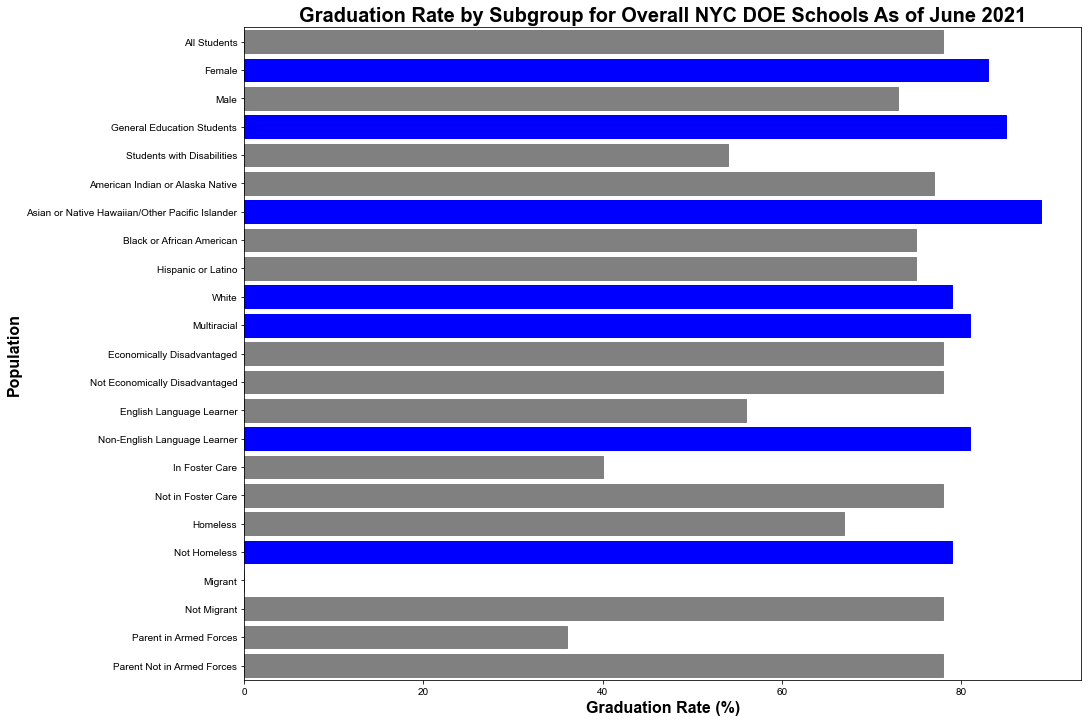

In [9]:
explore_df(overall_nyc, "Overall NYC DOE Schools", "city")

In [10]:
overall_nyc = overall_nyc.iloc[1:]

In [11]:
# Assuming the dataframe is stored in a variable called 'df'
# Extract the relevant columns for subgroup and graduation rate
subgroup_column = 'Subgroup'
grad_rate_column = 'GRAD_RATE'

# Filter out the 'All Students' subgroup since it represents the overall graduation rate
subgroup_data = overall_nyc[overall_nyc[subgroup_column] != 'All Students']

# Get unique subgroups in the dataset
subgroups = subgroup_data[subgroup_column].unique()

# List to store the significant differences
significant_differences = []

# Perform pairwise t-tests between each subgroup and the 'All Students' subgroup
for subgroup in subgroups:
    subgroup_rate = subgroup_data[subgroup_data[subgroup_column] == subgroup][grad_rate_column]
    all_students_rate = overall_nyc[overall_nyc[subgroup_column] == 'All Students'][grad_rate_column]

    # Convert the 'GRAD_RATE' columns to numeric and handle missing or invalid values
    subgroup_rate = pd.to_numeric(subgroup_rate, errors='coerce')
    all_students_rate = pd.to_numeric(all_students_rate, errors='coerce')

    # Check for missing or invalid values
    if subgroup_rate.isnull().any() or all_students_rate.isnull().any():
        continue

    # Calculate the subgroup rate relative to all students rate
    subgroup_rate = subgroup_rate / all_students_rate

    # Perform t-test only if there are valid values
    if np.isfinite(subgroup_rate).all():
        t_statistic, p_value = stats.ttest_ind(subgroup_rate, all_students_rate, equal_var=False)

        if np.isfinite(p_value) and p_value < 0.05:
            significant_differences.append(subgroup)

# Print the subgroups with significant differences
if len(significant_differences) > 0:
    print("Significant differences in graduation rates found for the following subgroups:")
    for subgroup in significant_differences:
        print(subgroup)
else:
    print("No significant differences in graduation rates found among subgroups.")

No significant differences in graduation rates found among subgroups.


In [12]:
# Assuming the dataframe is stored in a variable called 'df'
overall_students_percentage = overall_nyc.loc[overall_nyc['Subgroup'] == 'All Students', 'GRAD_PERCENTAGE'].values[0]

# Iterate through each subgroup and compare their graduation percentage to the overall percentage
for index, row in overall_nyc.iterrows():
    subgroup = row['Subgroup']
    subgroup_percentage = row['GRAD_PERCENTAGE']
    
    if subgroup != 'All Students':
        if subgroup_percentage > overall_students_percentage:
            print(f"The graduation percentage of the {subgroup} subgroup is higher than the overall percentage of students graduating from NYC public high schools.")
        elif subgroup_percentage < overall_students_percentage:
            print(f"The graduation percentage of the {subgroup} subgroup is lower than the overall percentage of students graduating from NYC public high schools.")
        else:
            print(f"The graduation percentage of the {subgroup} subgroup is equal to the overall percentage of students graduating from NYC public high schools.")

The graduation percentage of the Female subgroup is higher than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the Male subgroup is lower than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the General Education Students subgroup is higher than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the Students with Disabilities subgroup is lower than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the American Indian or Alaska Native subgroup is lower than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the Asian or Native Hawaiian/Other Pacific Islander subgroup is higher than the overall percentage of students graduating from NYC public high schools.
The graduation percentage of the Black or African American

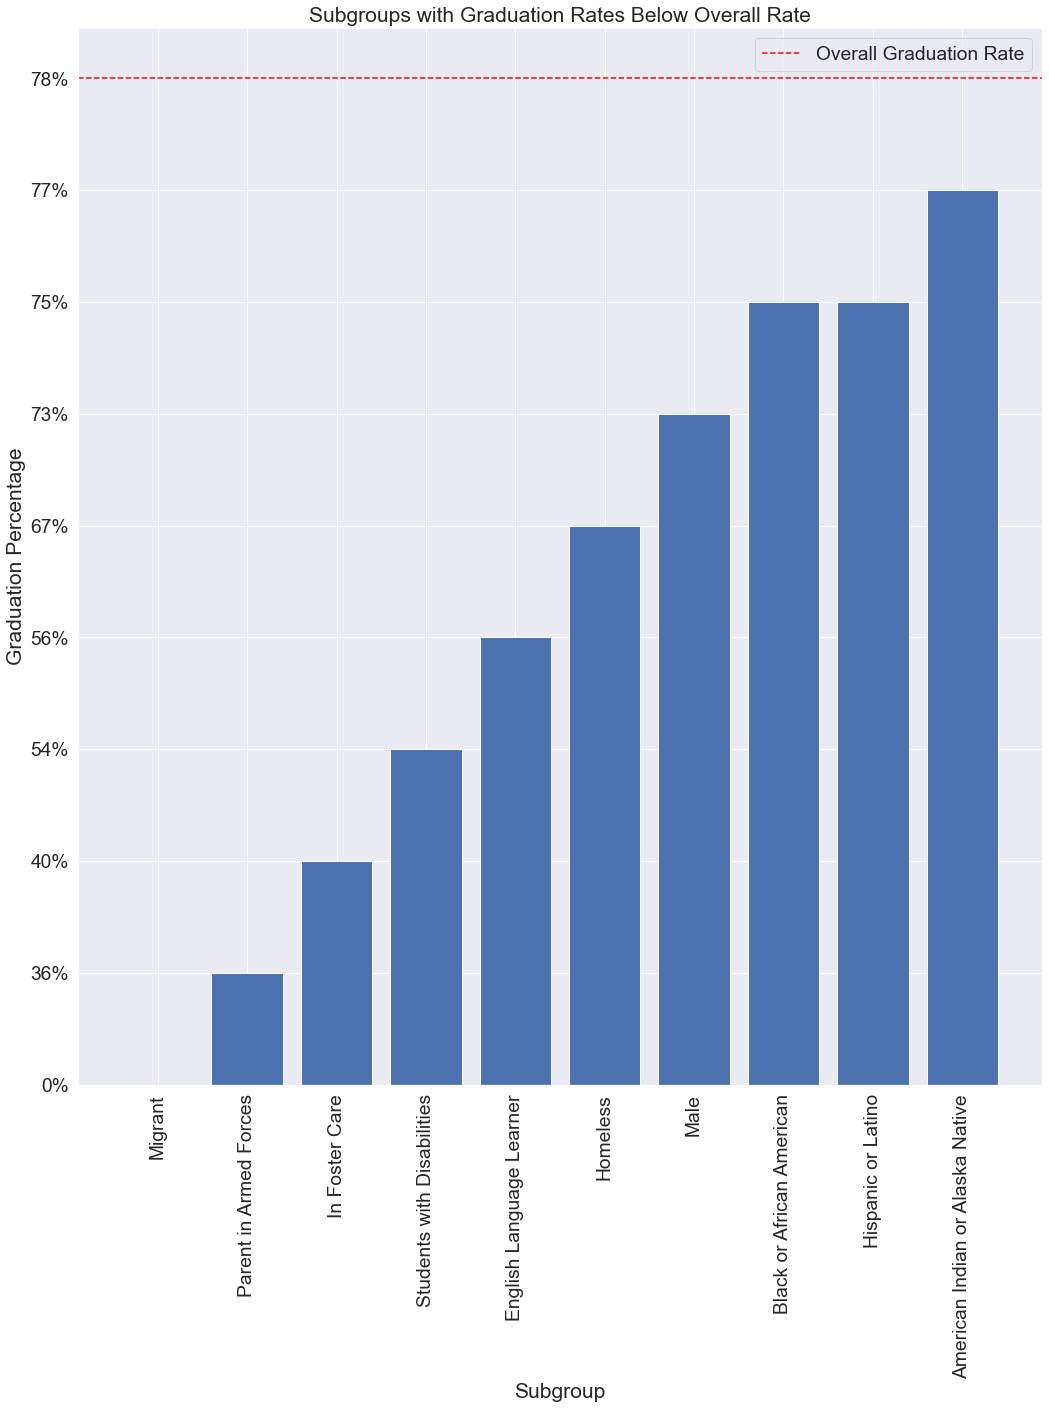

In [13]:
import matplotlib.pyplot as plt

# Assuming the dataframe is stored in a variable called 'df'
overall_students_percentage = overall_nyc.loc[overall_nyc['Subgroup'] == 'All Students', 'GRAD_PERCENTAGE'].values[0]

# Create a new column in the DataFrame to indicate whether the subgroup's graduation rate is lower than the overall rate
overall_nyc['Below_Overall_Rate'] = overall_nyc['GRAD_PERCENTAGE'] < overall_students_percentage

# Filter the DataFrame to only include the subgroups with graduation rates lower than the overall rate
subgroups_below_rate = overall_nyc[overall_nyc['Below_Overall_Rate']]

# Sort the subgroups_below_rate DataFrame by graduation rate in ascending order
subgroups_below_rate = subgroups_below_rate.sort_values(by='GRAD_PERCENTAGE')

# Plot the subgroups with graduation rates lower than the overall rate
plt.figure(figsize=(15, 20))
plt.bar(subgroups_below_rate['Subgroup'], subgroups_below_rate['GRAD_PERCENTAGE'])
plt.axhline(y=overall_students_percentage, color='red', linestyle='--', label='Overall Graduation Rate')
plt.xlabel('Subgroup')
plt.ylabel('Graduation Percentage')
plt.title('Subgroups with Graduation Rates Below Overall Rate')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Assuming the dataframe is stored in a variable called 'df'
overall_students_percentage = overall_nyc.loc[overall_nyc['Subgroup'] == 'All Students', 'GRAD_PERCENTAGE'].values[0]

# Convert 'GRAD_PERCENTAGE' column to numeric and handle missing or invalid values
overall_nyc['GRAD_PERCENTAGE'] = pd.to_numeric(overall_nyc['GRAD_PERCENTAGE'], errors='coerce')

# Iterate through each subgroup and perform a t-test to compare their graduation percentage to the overall percentage
for index, row in overall_nyc.iterrows():
    subgroup = row['Subgroup']
    subgroup_percentage = row['GRAD_PERCENTAGE']
    
    if pd.notna(subgroup_percentage) and subgroup != 'All Students':
        _, p_value = stats.ttest_ind([subgroup_percentage], [overall_students_percentage], alternative='less', equal_var=False)
        
        if p_value < 0.05:
            print(f"The graduation percentage of {subgroup} is significantly lower than the overall percentage.")
        else:
            print(f"The graduation percentage of {subgroup} is not significantly lower than the overall percentage.")

In [15]:
pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: scipy in c:\users\tenic\appdata\roaming\python\python38\site-packages (1.10.1)



In [16]:
# Assuming the dataframe is stored in a variable called 'df'
overall_students_percentage = overall_nyc.loc[overall_nyc['Subgroup'] == 'All Students', 'GRAD_PERCENTAGE'].values[0]

# Convert 'GRAD_PERCENTAGE' column to numeric and handle missing or invalid values
overall_nyc['GRAD_PERCENTAGE'] = pd.to_numeric(overall_nyc['GRAD_PERCENTAGE'], errors='coerce')

# Iterate through each subgroup and perform a t-test to compare their graduation percentage to the overall percentage
for index, row in overall_nyc.iterrows():
    subgroup = row['Subgroup']
    subgroup_percentage = row['GRAD_PERCENTAGE']
    
    if pd.notna(subgroup_percentage) and subgroup != 'All Students':
        _, p_value = stats.ttest_ind([subgroup_percentage], [overall_students_percentage], alternative='less', equal_var=False)
        
        if p_value < 0.05:
            print(f"The graduation percentage of {subgroup} is significantly lower than the overall percentage.")
        else:
            print(f"The graduation percentage of {subgroup} is not significantly lower than the overall percentage.")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            95         93   
 2                                            Female            68         67   
 3                                              Male            27         26   
 4                        General Education Students            68         66   
 5                        Students with Disabilities            27         27   
 6                  American Indian or Alaska Native             2          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             8          8   
 8                         Black or African American            26         26   
 9                                Hispanic or Latino            42         41   
 10                                            White            10         10   
 11                                      Multiracial             7          0   
 12                       Ec

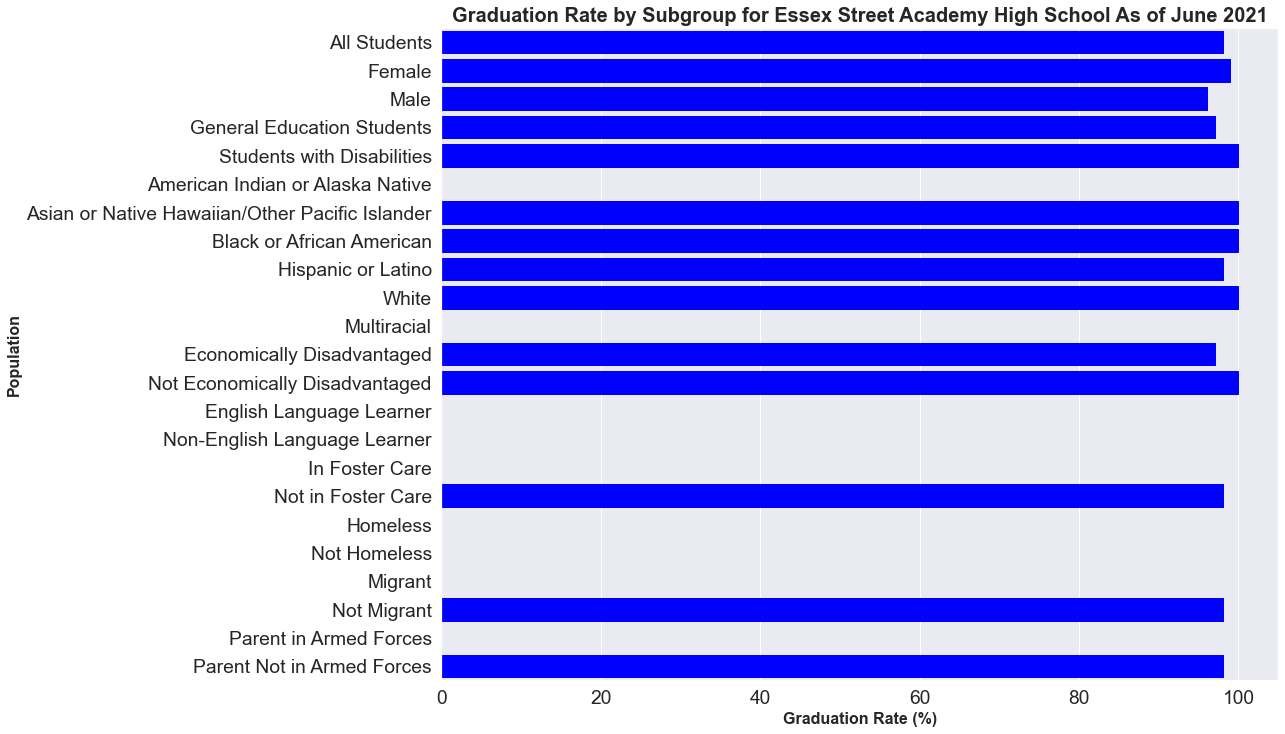

In [17]:
explore_df(essex, "Essex Street Academy High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students           382        368   
 2                                            Female           234        222   
 3                                              Male           148        146   
 4                        General Education Students           351        338   
 5                        Students with Disabilities            31         30   
 6                  American Indian or Alaska Native             7          6   
 7   Asian or Native Hawaiian/Other Pacific Islander            34         33   
 8                         Black or African American            57         56   
 9                                Hispanic or Latino            81         77   
 10                                            White           155        152   
 11                                      Multiracial            48         44   
 12                       Ec

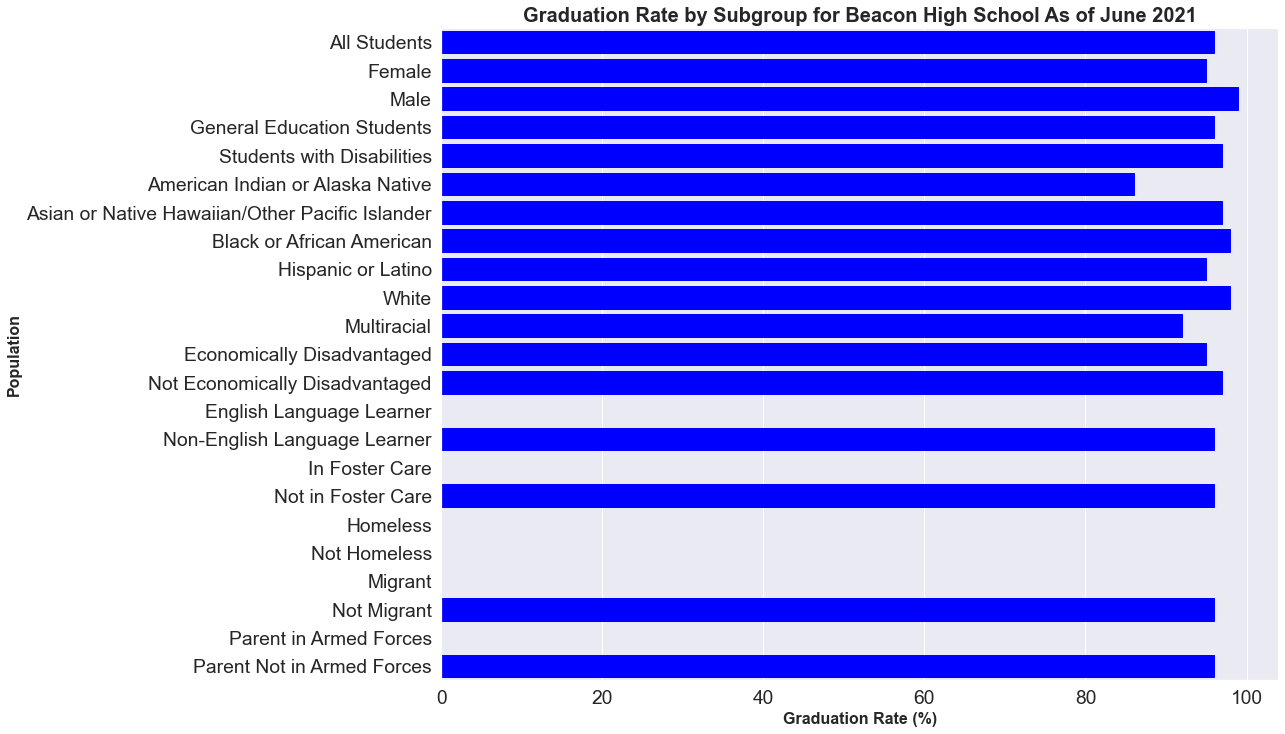

In [18]:
explore_df(beacon, "Beacon High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            66         54   
 2                                            Female            22         19   
 3                                              Male            44         35   
 4                        General Education Students            50         46   
 5                        Students with Disabilities            16          8   
 6                  American Indian or Alaska Native             0          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             0          0   
 8                         Black or African American            23          0   
 9                                Hispanic or Latino            40         29   
 10                                            White             3          0   
 11                                      Multiracial             0          0   
 12                       Ec

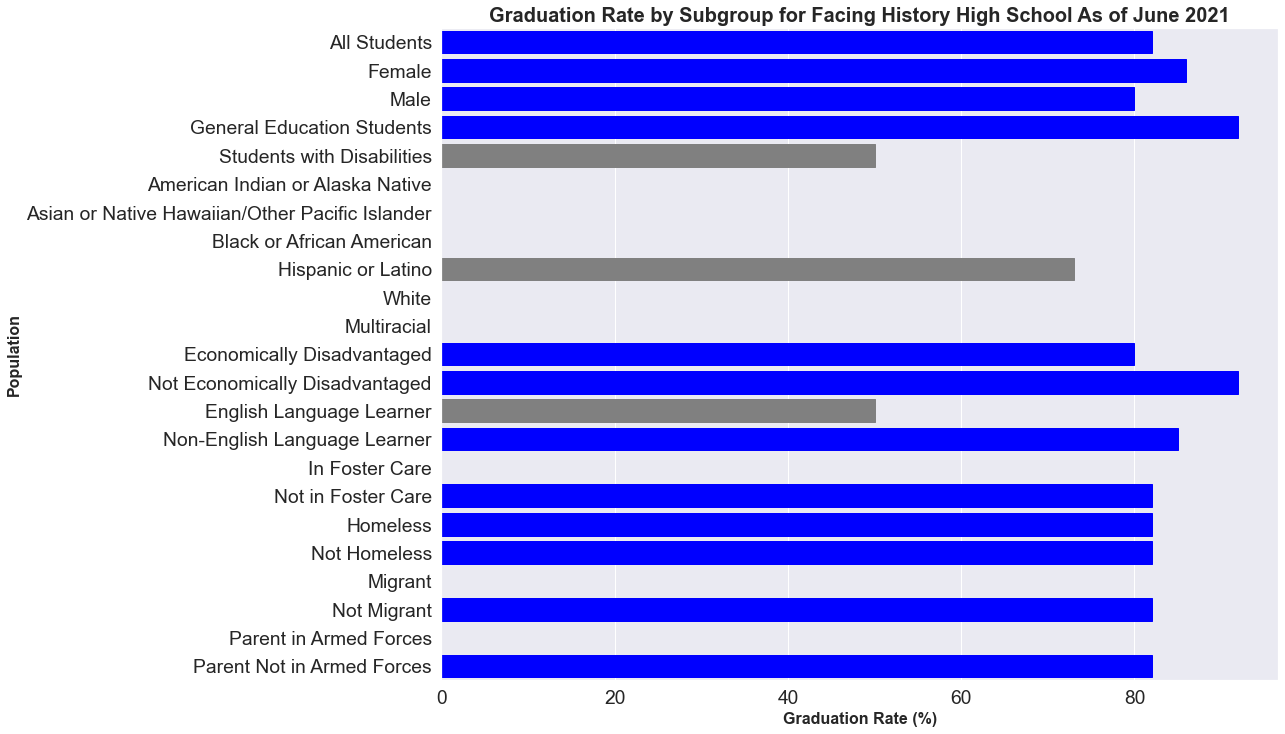

In [19]:
explore_df(facing_history, "Facing History High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students           108         96   
 2                                            Female            57         49   
 3                                              Male            51         47   
 4                        General Education Students            80         72   
 5                        Students with Disabilities            28         24   
 6                  American Indian or Alaska Native             0          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             4          0   
 8                         Black or African American            21         16   
 9                                Hispanic or Latino            51         46   
 10                                            White            28         26   
 11                                      Multiracial             4          0   
 12                       Ec

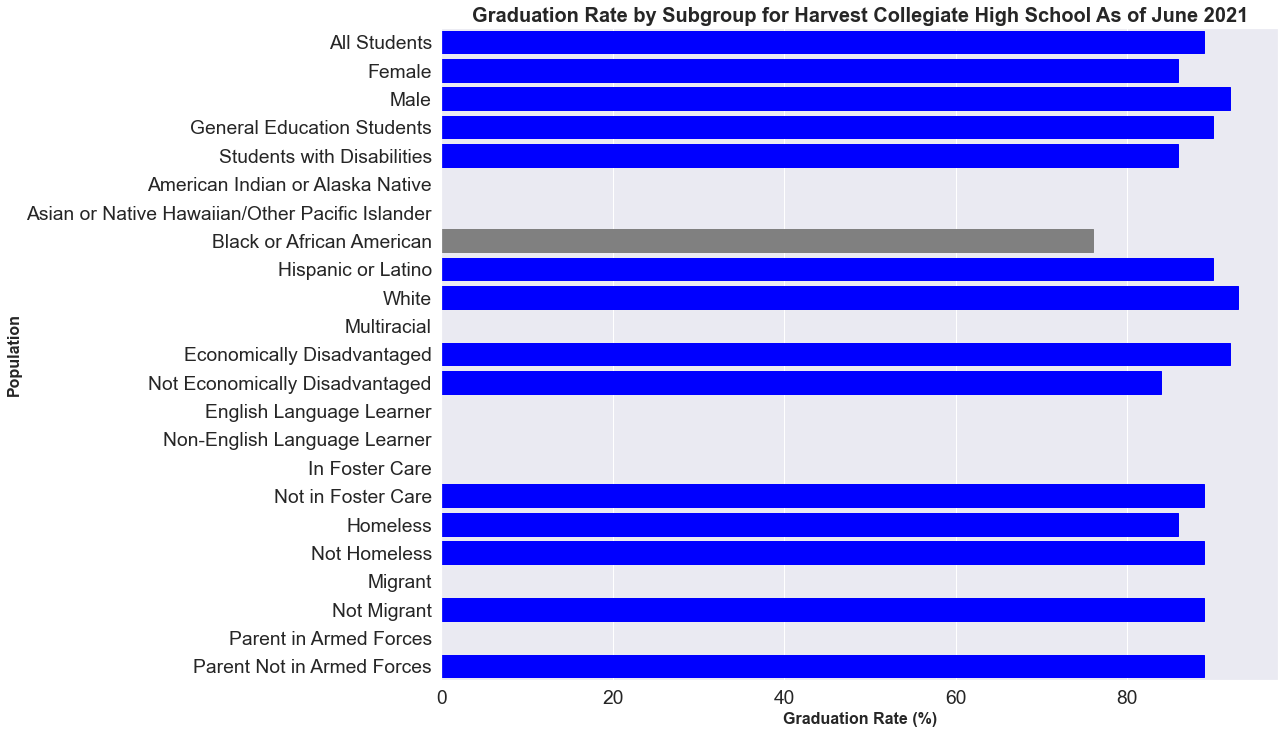

In [20]:
explore_df(harvest, "Harvest Collegiate High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            69         64   
 2                                            Female            46         43   
 3                                              Male            23         21   
 4                        General Education Students            56         52   
 5                        Students with Disabilities            13         12   
 6                  American Indian or Alaska Native             2          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             6          4   
 8                         Black or African American            14         13   
 9                                Hispanic or Latino            39         37   
 10                                            White             5          5   
 11                                      Multiracial             3          0   
 12                       Ec

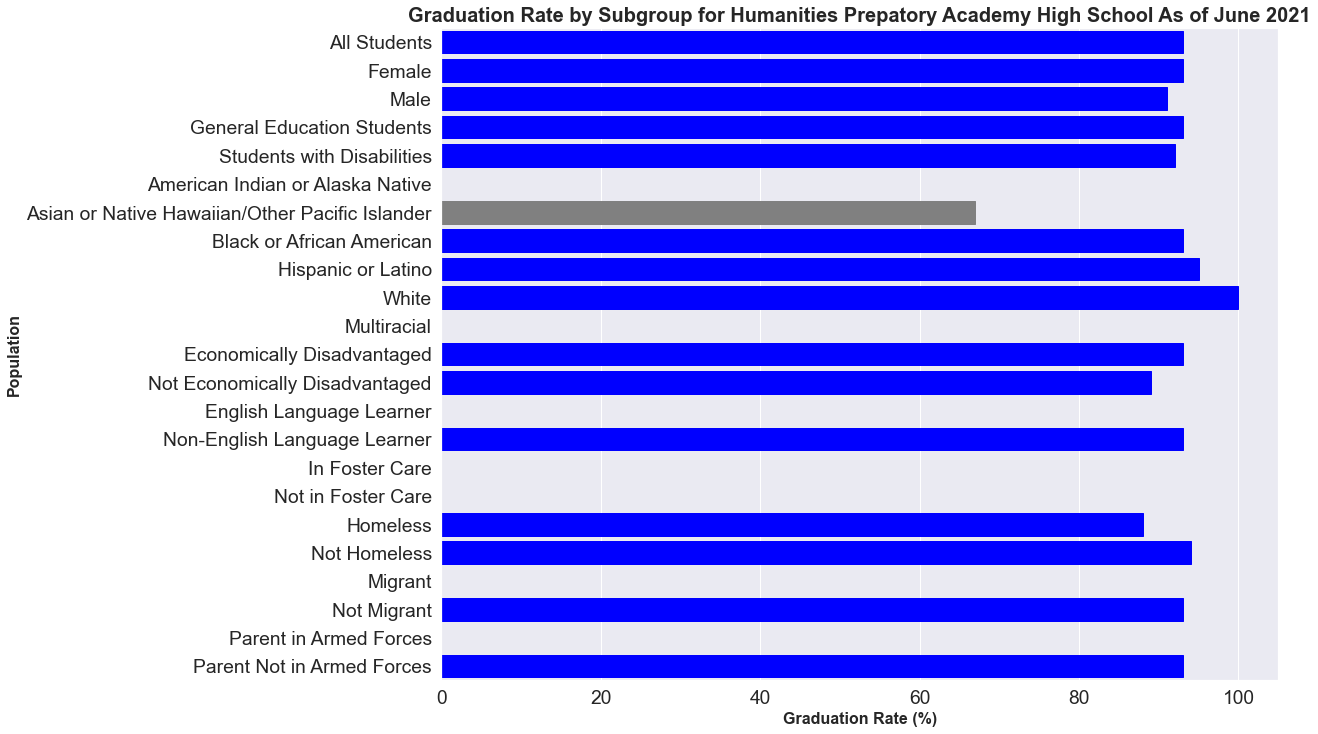

In [21]:
explore_df(humanities_prep, "Humanities Prepatory Academy High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            71         68   
 2                                            Female            35         35   
 3                                              Male            36         33   
 4                        General Education Students            57         55   
 5                        Students with Disabilities            14         13   
 6                  American Indian or Alaska Native             0          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             2          0   
 8                         Black or African American            12          0   
 9                                Hispanic or Latino            18         17   
 10                                            White            37         36   
 11                                      Multiracial             2          0   
 12                       Ec

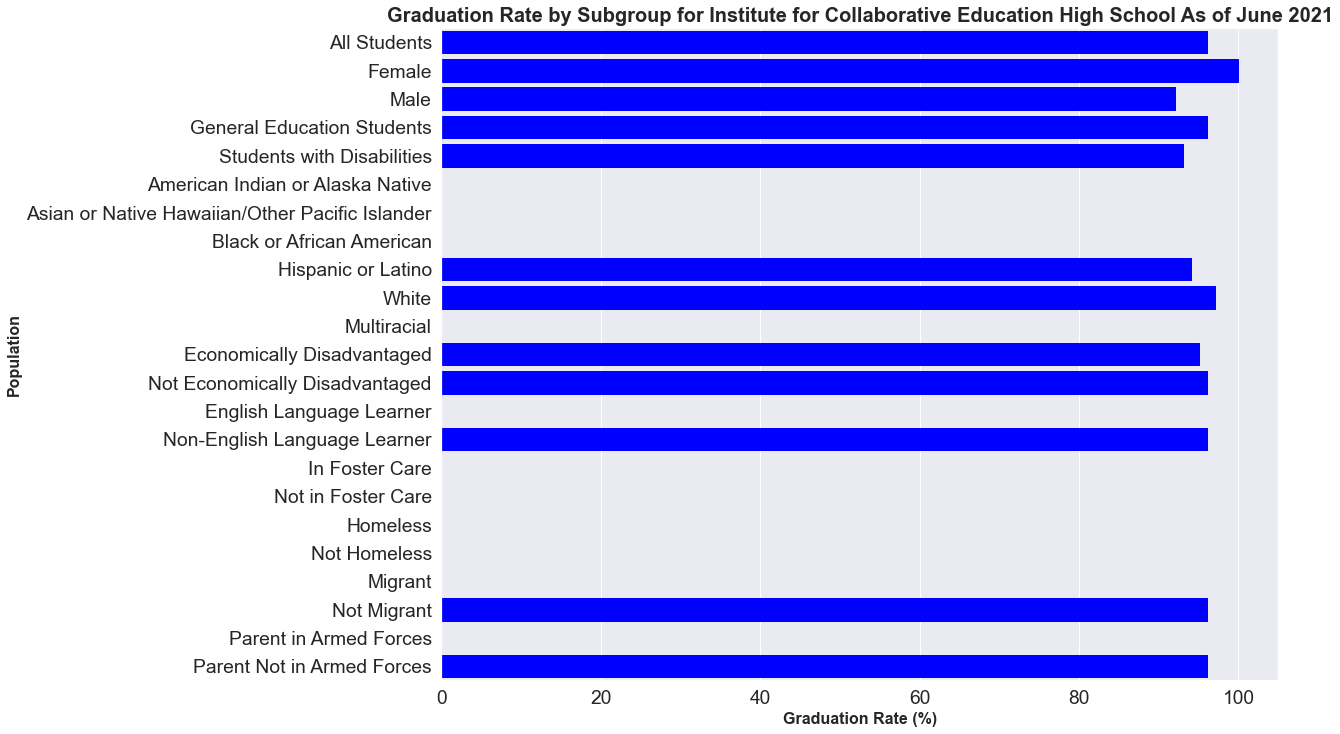

In [22]:
explore_df(ice, "Institute for Collaborative Education High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            73         59   
 2                                            Female            42         33   
 3                                              Male            31         26   
 4                        General Education Students            54         46   
 5                        Students with Disabilities            19         13   
 6                  American Indian or Alaska Native             1          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             4          0   
 8                         Black or African American            21         17   
 9                                Hispanic or Latino            45         35   
 10                                            White             2          0   
 11                                      Multiracial             0          0   
 12                       Ec

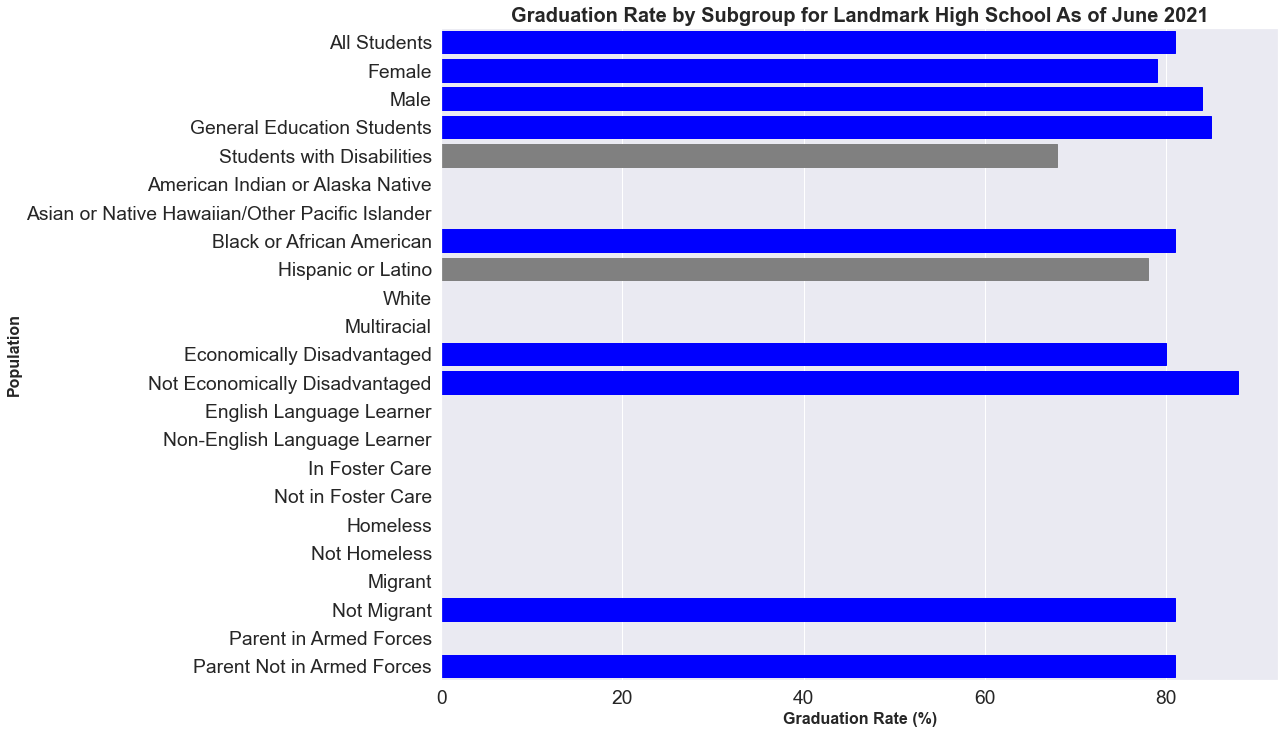

In [23]:
explore_df(landmark, "Landmark High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students            72         49   
 2                                            Female            31         23   
 3                                              Male            41         26   
 4                        General Education Students            71          0   
 5                        Students with Disabilities             1          0   
 6                  American Indian or Alaska Native             0          0   
 7   Asian or Native Hawaiian/Other Pacific Islander            14         12   
 8                         Black or African American             9          6   
 9                                Hispanic or Latino            39         24   
 10                                            White             9          0   
 11                                      Multiracial             1          0   
 12                       Ec

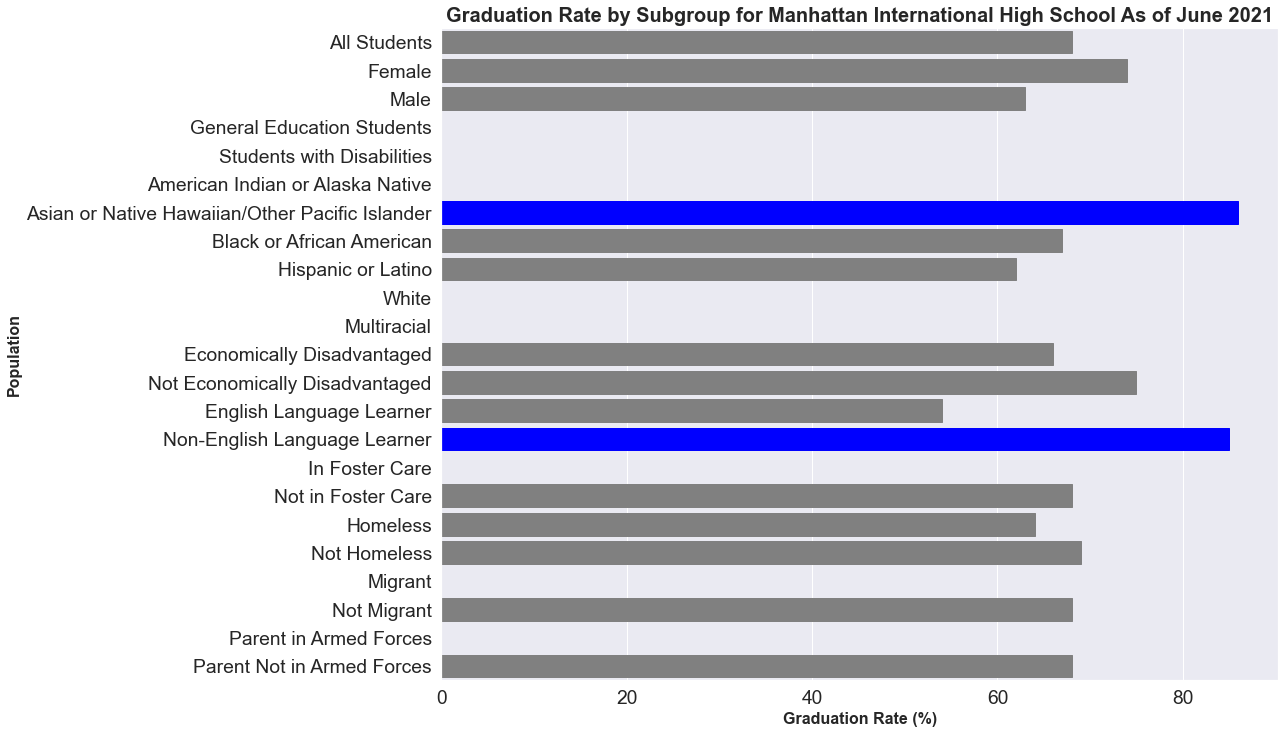

In [24]:
explore_df(mihs, "Manhattan International High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students           101         97   
 2                                            Female            47         46   
 3                                              Male            54         51   
 4                        General Education Students            81         78   
 5                        Students with Disabilities            20         19   
 6                  American Indian or Alaska Native             0          0   
 7   Asian or Native Hawaiian/Other Pacific Islander            20         19   
 8                         Black or African American            10         10   
 9                                Hispanic or Latino            30         27   
 10                                            White            33         33   
 11                                      Multiracial             8          8   
 12                       Ec

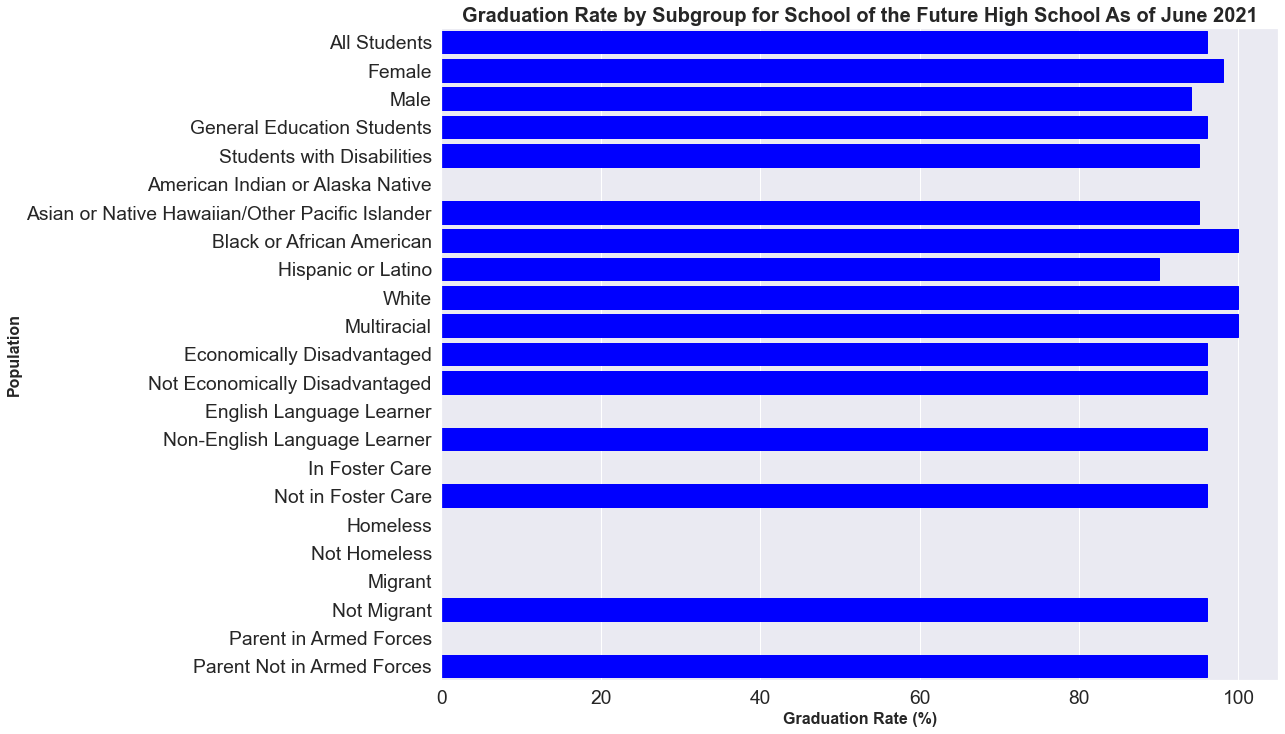

In [25]:
explore_df(sof, "School of the Future High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Subgroup                                      23 non-null     object
 1   ALL_STUDENTS                                  23 non-null     int32 
 2   GRAD_RATE                                     23 non-null     int32 
 3   GRAD_PERCENTAGE                               23 non-null     int32 
 4   REGENTS_WITH_ADVANCED_DESIGNATION             23 non-null     int32 
 5   REGENTS_W

(                                           Subgroup  ALL_STUDENTS  GRAD_RATE  \
 1                                      All Students           102         64   
 2                                            Female            52         37   
 3                                              Male            50         27   
 4                        General Education Students            77         51   
 5                        Students with Disabilities            25         13   
 6                  American Indian or Alaska Native             1          0   
 7   Asian or Native Hawaiian/Other Pacific Islander             5          3   
 8                         Black or African American            30         22   
 9                                Hispanic or Latino            60         34   
 10                                            White             4          0   
 11                                      Multiracial             2          0   
 12                       Ec

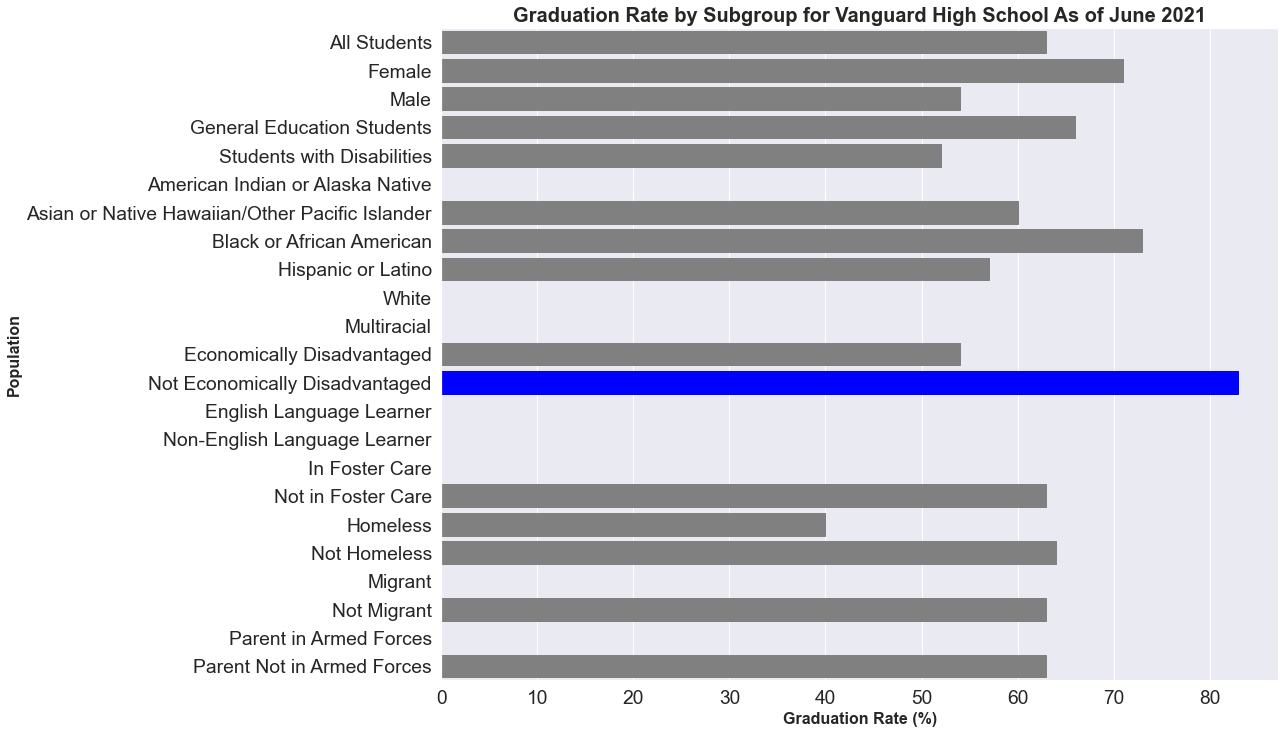

In [26]:
explore_df(vhs, "Vanguard High School", "city")

In [27]:
import ipywidgets as widgets

In [28]:
widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)

IntSlider(value=2017, description='Year:', max=2021, min=2016)

In [29]:
from IPython.display import display

In [30]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
display(slider)

IntSlider(value=2017, description='Year:', max=2021, min=2016)

In [31]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=2017, description='Year:', max=2021, min=2016)

IntText(value=0)

Link(source=(IntSlider(value=2017, description='Year:', max=2021, min=2016), 'value'), target=(IntText(value=0…

In [32]:
btn = widgets.Button(description='NYSED')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='NYSED', style=ButtonStyle())

In [33]:
checkbox = widgets.Checkbox(
           description='Check to invert',)

In [34]:
display(checkbox)

Checkbox(value=False, description='Check to invert')

In [ ]:
sof_subset = sof.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_PERCENTAGE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
sof_subset

#new_df = df.loc[:, ["director","column1", "column2",  "column3",..., "columnn"]]

In [66]:
overall_nyc_subset = overall_nyc.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_RATE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
overall_nyc_subset.head(23)

Subgroup ALL_STUDENTS GRAD_RATE  \
1                                      All Students        80294     62636   
2                                            Female        38739     32341   
3                                              Male        41555     30295   
4                        General Education Students        62760     53154   
5                        Students with Disabilities        17534      9482   
6                  American Indian or Alaska Native          913       707   
7   Asian or Native Hawaiian/Other Pacific Islander        13154     11658   
8                         Black or African American        20655     15556   
9                                Hispanic or Latino        31662     23656   
10                                            White        12486      9906   
11                                      Multiracial         1424      1153   
12                       Economically Disadvantaged        57636     44949   
13                   Not Economically Disadvantaged        22658     17687   
14                         English Language Learner         8538      4744   
15                     Non-English Language Learner        71756     57892   
16                                   In Foster Care          433       175   
17                               Not in Foster Care        79861     62461   
18                                         Homeless         5788      3858   
19                                     Not Homeless        74506     58778   
20                                          Migrant            0         0   
21                                      Not Migrant        80294     62636   
22                           Parent in Armed Forces           11         4   
23                       Parent Not in Armed Forces        80283     62632   

   REGENTS_DIPLOMA_PERCENTAGE DROPOUT_PERCENTAGE  
1                         42%                 5%  
2                         43%                 3%  
3                         42%                 6%  
4                         43%                 4%  
5                         42%                 7%  
6                         45%                 5%  
7                         26%                 3%  
8                         53%                 5%  
9                         46%                 6%  
10                        33%                 2%  
11                        39%                 2%  
12                        45%                 5%  
13                        36%                 4%  
14                        46%                16%  
15                        42%                 3%  
16                        34%                17%  
17                        43%                 5%  
18                        47%                12%  
19                        42%                 4%  
20                         0%                 0%  
21                        42%                 5%  
22                        18%                 0%  
23                        42%                 5%

In [67]:
def remove_special_chars_df(df):
    for col in df.columns:
        print(col)
    df = df.replace({"\%":""}, regex = True)
    df = df.replace({"—": 0}, regex = True)
    df = df.astype({col: int for col in df.columns[1:]})
    return df


In [68]:
overall_nyc_subset["Population"] = "CITYWIDE"

In [69]:
overall_nyc_subset

Subgroup ALL_STUDENTS GRAD_RATE  \
1                                      All Students        80294     62636   
2                                            Female        38739     32341   
3                                              Male        41555     30295   
4                        General Education Students        62760     53154   
5                        Students with Disabilities        17534      9482   
6                  American Indian or Alaska Native          913       707   
7   Asian or Native Hawaiian/Other Pacific Islander        13154     11658   
8                         Black or African American        20655     15556   
9                                Hispanic or Latino        31662     23656   
10                                            White        12486      9906   
11                                      Multiracial         1424      1153   
12                       Economically Disadvantaged        57636     44949   
13                   Not Economically Disadvantaged        22658     17687   
14                         English Language Learner         8538      4744   
15                     Non-English Language Learner        71756     57892   
16                                   In Foster Care          433       175   
17                               Not in Foster Care        79861     62461   
18                                         Homeless         5788      3858   
19                                     Not Homeless        74506     58778   
20                                          Migrant            0         0   
21                                      Not Migrant        80294     62636   
22                           Parent in Armed Forces           11         4   
23                       Parent Not in Armed Forces        80283     62632   

   REGENTS_DIPLOMA_PERCENTAGE DROPOUT_PERCENTAGE Population  
1                         42%                 5%   CITYWIDE  
2                         43%                 3%   CITYWIDE  
3                         42%                 6%   CITYWIDE  
4                         43%                 4%   CITYWIDE  
5                         42%                 7%   CITYWIDE  
6                         45%                 5%   CITYWIDE  
7                         26%                 3%   CITYWIDE  
8                         53%                 5%   CITYWIDE  
9                         46%                 6%   CITYWIDE  
10                        33%                 2%   CITYWIDE  
11                        39%                 2%   CITYWIDE  
12                        45%                 5%   CITYWIDE  
13                        36%                 4%   CITYWIDE  
14                        46%                16%   CITYWIDE  
15                        42%                 3%   CITYWIDE  
16                        34%                17%   CITYWIDE  
17                        43%                 5%   CITYWIDE  
18                        47%                12%   CITYWIDE  
19                        42%                 4%   CITYWIDE  
20                         0%                 0%   CITYWIDE  
21                        42%                 5%   CITYWIDE  
22                        18%                 0%   CITYWIDE  
23                        42%                 5%   CITYWIDE

In [70]:
sof_subset = remove_special_chars_df(sof_subset);

Subgroup
ALL_STUDENTS
GRAD_PERCENTAGE
REGENTS_DIPLOMA_PERCENTAGE
DROPOUT_PERCENTAGE
Population


ValueError: invalid literal for int() with base 10: 'SOF'

In [ ]:
sof_subset["Population"] = "SOF"
sof_subset

In [ ]:
#grouped = df.groupby(['Population', 'Subgroup'])['GRAD_PERCENTAGE']
grouped_sof = sof_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [ ]:
grouped_sof

In [ ]:
grouped_nyc_overall = overall_nyc_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [ ]:
grouped_nyc_overall

In [47]:
#merged_df = pd.merge(left = df1, right = df2, left_on = ["primary_key"], 
#                          right_on = ["primary_key"], how = "inner")
#merged_df.head()



In [48]:
#pd.concat([df1, df2])
test = pd.concat([grouped_nyc_overall, grouped_sof])

In [49]:
test2 = pd.concat([sof_subset, overall_nyc_subset])
test2

Subgroup ALL_STUDENTS  \
1                                      All Students          101   
2                                            Female           47   
3                                              Male           54   
4                        General Education Students           81   
5                        Students with Disabilities           20   
6                  American Indian or Alaska Native            0   
7   Asian or Native Hawaiian/Other Pacific Islander           20   
8                         Black or African American           10   
9                                Hispanic or Latino           30   
10                                            White           33   
11                                      Multiracial            8   
12                       Economically Disadvantaged           45   
13                   Not Economically Disadvantaged           56   
14                         English Language Learner            0   
15                     Non-English Language Learner          101   
16                                   In Foster Care            0   
17                               Not in Foster Care          101   
18                                         Homeless            1   
19                                     Not Homeless          100   
20                                          Migrant            0   
21                                      Not Migrant          101   
22                           Parent in Armed Forces            0   
23                       Parent Not in Armed Forces          101   
1                                      All Students        80294   
2                                            Female        38739   
3                                              Male        41555   
4                        General Education Students        62760   
5                        Students with Disabilities        17534   
6                  American Indian or Alaska Native          913   
7   Asian or Native Hawaiian/Other Pacific Islander        13154   
8                         Black or African American        20655   
9                                Hispanic or Latino        31662   
10                                            White        12486   
11                                      Multiracial         1424   
12                       Economically Disadvantaged        57636   
13                   Not Economically Disadvantaged        22658   
14                         English Language Learner         8538   
15                     Non-English Language Learner        71756   
16                                   In Foster Care          433   
17                               Not in Foster Care        79861   
18                                         Homeless         5788   
19                                     Not Homeless        74506   
20                                          Migrant            0   
21                                      Not Migrant        80294   
22                           Parent in Armed Forces           11   
23                       Parent Not in Armed Forces        80283   

    GRAD_PERCENTAGE REGENTS_DIPLOMA_PERCENTAGE DROPOUT_PERCENTAGE Population  
1             96.00                         96                  0        SOF  
2             98.00                         98                  0        SOF  
3             94.00                         94                  0        SOF  
4             96.00                         96                  0        SOF  
5             95.00                         95                  0        SOF  
6              0.00                          0                  0        SOF  
7             95.00                         95                  0        SOF  
8            100.00                        100                  0        SOF  
9             90.00                         90                  0        SOF  
10           100.00                        100          

In [50]:
test3 = test2.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()
test3 = pd.DataFrame(test3)
test3

GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                 nan
           American Indian or Alaska Native                             nan
           Asian or Native Hawaiian/Other Pacific Islander              nan
           Black or African American                                    nan
           Economically Disadvantaged                                   nan
           English Language Learner                                     nan
           Female                                                       nan
           General Education Students                                   nan
           Hispanic or Latino                                           nan
           Homeless                                                     nan
           In Foster Care                                               nan
           Male                                                         nan
           Migrant                                                      nan
           Multiracial                                                  nan
           Non-English Language Learner                                 nan
           Not Economically Disadvantaged                               nan
           Not Homeless                                                 nan
           Not Migrant                                                  nan
           Not in Foster Care                                           nan
           Parent Not in Armed Forces                                   nan
           Parent in Armed Forces                                       nan
           Students with Disabilities                                   nan
           White                                                        nan
SOF        All Students                                               96.00
           American Indian or Alaska Native                            0.00
           Asian or Native Hawaiian/Other Pacific Islander            95.00
           Black or African American                                 100.00
           Economically Disadvantaged                                 96.00
           English Language Learner                                    0.00
           Female                                                     98.00
           General Education Students                                 96.00
           Hispanic or Latino                                         90.00
           Homeless                                                    0.00
           In Foster Care                                              0.00
           Male                                                       94.00
           Migrant                                                     0.00
           Multiracial                                               100.00
           Non-English Language Learner                               96.00
           Not Economically Disadvantaged                             96.00
           Not Homeless                                                0.00
           Not Migrant                                                96.00
           Not in Foster Care                                         96.00
           Parent Not in Armed Forces                                 96.00
           Parent in Armed Forces                                      0.00
           Students with Disabilities                                 95.00
           White                                                     100.00

In [51]:
test = pd.DataFrame(test)
test

GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                 nan
           American Indian or Alaska Native                             nan
           Asian or Native Hawaiian/Other Pacific Islander              nan
           Black or African American                                    nan
           Economically Disadvantaged                                   nan
           English Language Learner                                     nan
           Female                                                       nan
           General Education Students                                   nan
           Hispanic or Latino                                           nan
           Homeless                                                     nan
           In Foster Care                                               nan
           Male                                                         nan
           Migrant                                                      nan
           Multiracial                                                  nan
           Non-English Language Learner                                 nan
           Not Economically Disadvantaged                               nan
           Not Homeless                                                 nan
           Not Migrant                                                  nan
           Not in Foster Care                                           nan
           Parent Not in Armed Forces                                   nan
           Parent in Armed Forces                                       nan
           Students with Disabilities                                   nan
           White                                                        nan
SOF        All Students                                               96.00
           American Indian or Alaska Native                            0.00
           Asian or Native Hawaiian/Other Pacific Islander            95.00
           Black or African American                                 100.00
           Economically Disadvantaged                                 96.00
           English Language Learner                                    0.00
           Female                                                     98.00
           General Education Students                                 96.00
           Hispanic or Latino                                         90.00
           Homeless                                                    0.00
           In Foster Care                                              0.00
           Male                                                       94.00
           Migrant                                                     0.00
           Multiracial                                               100.00
           Non-English Language Learner                               96.00
           Not Economically Disadvantaged                             96.00
           Not Homeless                                                0.00
           Not Migrant                                                96.00
           Not in Foster Care                                         96.00
           Parent Not in Armed Forces                                 96.00
           Parent in Armed Forces                                      0.00
           Students with Disabilities                                 95.00
           White                                                     100.00

In [52]:
test.reset_index

<bound method DataFrame.reset_index of                                                             GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                 nan
           American Indian or Alaska Native                             nan
           Asian or Native Hawaiian/Other Pacific Islander              nan
           Black or African American                                    nan
           Economically Disadvantaged                                   nan
           English Language Learner                                     nan
           Female                                                       nan
           General Education Students                                   nan
           Hispanic or Latino                                           nan
           Homeless                                                     nan
           In Foster Care                        

In [53]:
test.columns

Index(['GRAD_PERCENTAGE'], dtype='object')

In [54]:
test.transpose()
test.columns

Index(['GRAD_PERCENTAGE'], dtype='object')

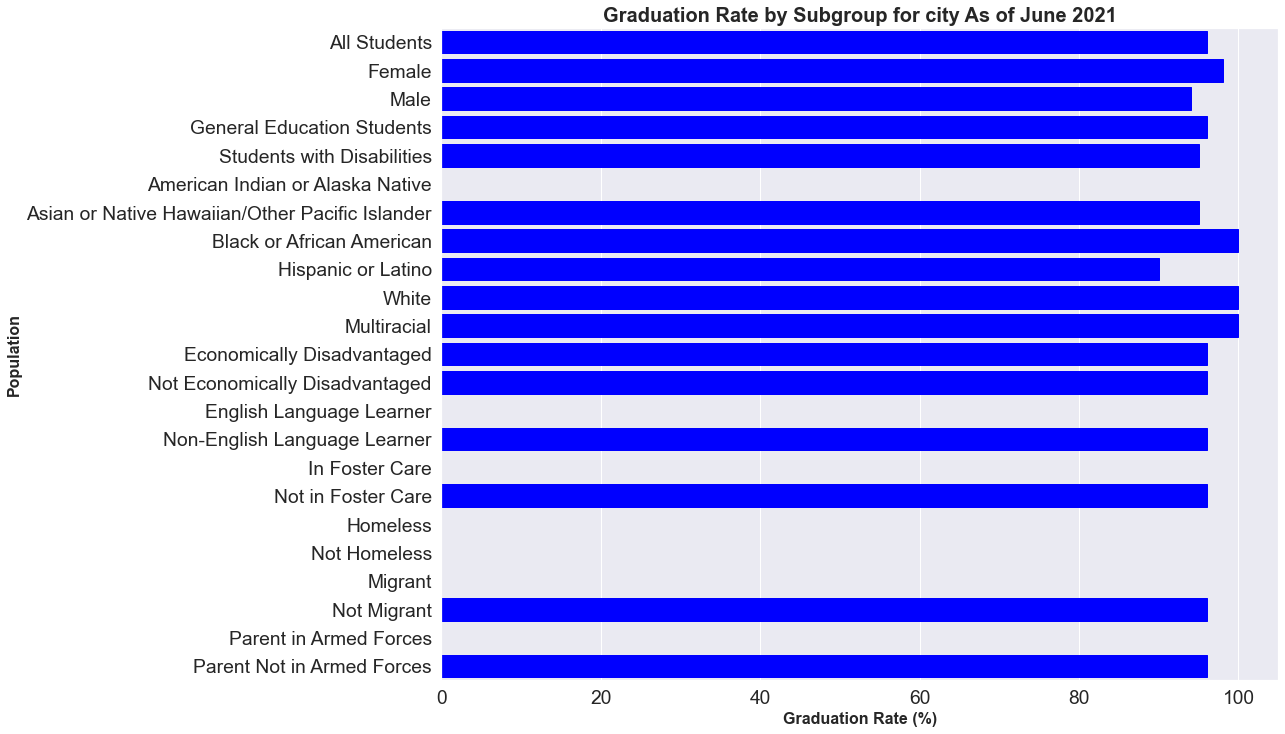

In [55]:
plot_bar(test2, "city", 84)

In [56]:
retention = pd.read_excel('Data/College-Retention-by-Entering-Cohort.xlsx')

In [57]:
retention.head(52)

State Name  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0           Alaska  0.50  0.52  0.52  0.53  0.52  0.52  0.51  0.55  0.51   
1          Alabama  0.65  0.63  0.63  0.65  0.66  0.64  0.69  0.69  0.68   
2         Arkansas  0.60  0.59  0.59  0.60  0.60  0.61  0.64  0.63  0.65   
3          Arizona  0.53  0.54  0.53  0.54  0.57  0.60  0.61  0.62  0.61   
4       California  0.60  0.61  0.62  0.65  0.64  0.64  0.65  0.65  0.66   
5         Colorado  0.63  0.61  0.61  0.63  0.63  0.63  0.65  0.66  0.66   
6      Connecticut  0.69  0.69  0.70  0.71  0.71  0.68  0.71  0.72  0.73   
7              D.C  0.85  0.83  0.85  0.83  0.84  0.81  0.81  0.83  0.83   
8         Delaware  0.75  0.75  0.78  0.79  0.77  0.75  0.72  0.71  0.71   
9          Florida  0.67  0.66  0.66  0.67  0.67  0.67  0.68  0.68  0.68   
10         Georgia  0.66  0.64  0.67  0.68  0.69  0.69  0.69  0.69  0.69   
11          Hawaii  0.57  0.58  0.60  0.58  0.58  0.56  0.58  0.60  0.57   
12            Iowa  0.65  0.66  0.65  0.67  0.68  0.69  0.70  0.70  0.70   
13           Idaho  0.59  0.59  0.51  0.54  0.53  0.59  0.61  0.62  0.61   
14        Illinois  0.62  0.62  0.61  0.63  0.64  0.63  0.65  0.66  0.66   
15         Indiana  0.70  0.70  0.66  0.66  0.66  0.65  0.67  0.67  0.68   
16          Kansas  0.59  0.59  0.60  0.54  0.56  0.57  0.61  0.60  0.60   
17        Kentucky  0.59  0.59  0.56  0.57  0.60  0.59  0.63  0.62  0.62   
18       Louisiana  0.63  0.60  0.60  0.62  0.61  0.62  0.58  0.63  0.61   
19   Massachusetts  0.72  0.73  0.73  0.74  0.74  0.74  0.74  0.74  0.75   
20        Maryland  0.60  0.61  0.62  0.63  0.64  0.64  0.65  0.66  0.67   
21           Maine  0.66  0.66  0.66  0.67  0.66  0.66  0.68  0.67  0.68   
22        Michigan  0.63  0.62  0.62  0.64  0.65  0.66  0.67  0.67  0.69   
23       Minnesota  0.65  0.65  0.66  0.66  0.66  0.67  0.67  0.68  0.68   
24        Missouri  0.63  0.64  0.62  0.58  0.62  0.60  0.64  0.63  0.62   
25     Mississippi  0.63  0.62  0.61  0.62  0.63  0.65  0.66  0.65  0.65   
26         Montana  0.61  0.62  0.62  0.61  0.63  0.62  0.62  0.62  0.61   
27  North Carolina  0.65  0.64  0.63  0.64  0.65  0.64  0.66  0.67  0.67   
28    North Dakota  0.71  0.68  0.67  0.68  0.68  0.68  0.70  0.69  0.70   
29        Nebraska  0.61  0.61  0.62  0.62  0.63  0.66  0.67  0.66  0.66   
30   New Hampshire  0.71  0.70  0.71  0.71  0.69  0.67  0.68  0.65  0.67   
31      New Jersey  0.68  0.68  0.69  0.70  0.70  0.71  0.71  0.72  0.72   
32      New Mexico  0.55  0.53  0.54  0.54  0.53  0.55  0.57  0.57  0.58   
33          Nevada  0.56  0.50  0.52  0.55  0.57  0.56  0.63  0.62  0.61   
34        New York  0.71  0.70  0.70  0.71  0.72  0.71  0.71  0.71  0.71   
35            Ohio  0.64  0.62  0.62  0.64  0.67  0.66  0.68  0.68  0.68   
36        Oklahoma  0.54  0.53  0.48  0.54  0.54  0.51  0.61  0.57  0.54   
37          Oregon  0.60  0.61  0.61  0.61  0.61  0.61  0.61  0.63  0.62   
38    Pennsylvania  0.73  0.73  0.73  0.74  0.74  0.74  0.75  0.75  0.75   
39    Rhode Island  0.73  0.74  0.74  0.76  0.76  0.76  0.77  0.78  0.77   
40  South Carolina  0.62  0.62  0.62  0.62  0.62  0.64  0.64  0.64  0.63   
41    South Dakota  0.68  0.68  0.68  0.70  0.69  0.69  0.71  0.71  0.70   
42       Tennessee  0.65  0.64  0.63  0.64  0.65  0.65  0.64  0.67  0.65   
43           Texas  0.60  0.59  0.59  0.59  0.61  0.61  0.63  0.63  0.63   
44            Utah  0.54  0.54  0.53  0.48  0.54  0.52  0.55  0.55  0.56   
45        Virginia  0.66  0.68  0.68  0.69  0.68  0.69  0.70  0.71  0.71   
46         Vermont  0.72  0.69  0.78  0.71  0.73  0.71  0.73  0.73  0.72   
47      Washington  0.61  0.61  0.62  0.64  0.63  0.64  0.65  0.66  0.64   
48       Wisconsin  0.68  0.68  0.69  0.69  0.70  0.68  0.69  0.70  0.70   
49   West Virginia  0.63  0.60  0.59  0.58  0.51  0.51  0.63  0.61  0.58   
50         Wyoming  0.54  0.53  0.54  0.51  0.55  0.57  0.55  0.56  0.54   
51     Multi-State  0.45  0.45  0.44  0.46  0.48  0.47  

In [58]:
retention_year = pd.read_excel('Data/Retention-by-cohort-year.xlsx')
retention_year

State Name State Symbol  Year  Retention Rate  Persistence
0           Alaska           AK  2009            0.50         0.55
1          Alabama           AL  2009            0.65         0.74
2         Arkansas           AR  2009            0.60         0.68
3          Arizona           AZ  2009            0.53         0.63
4       California           CA  2009            0.60         0.69
..             ...          ...   ...             ...          ...
567     Washington           WA  2019            0.60          nan
568      Wisconsin           WI  2019            0.68          nan
569  West Virginia           WV  2019            0.60          nan
570        Wyoming           WY  2019            0.56          nan
571    Multi-State           MU  2019            0.48          nan

[572 rows x 5 columns]

In [59]:
retention_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Name      572 non-null    object 
 1   State Symbol    572 non-null    object 
 2   Year            572 non-null    int64  
 3   Retention Rate  572 non-null    float64
 4   Persistence     156 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 22.5+ KB


In [60]:
retention_year = pd.DataFrame(retention_year)

In [61]:
retention_year['Year'] = retention_year['Year'].astype(str)
retention_year['Retention Rate (%)'] = retention_year['Retention Rate']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [62]:
retention_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State Name          572 non-null    object 
 1   State Symbol        572 non-null    object 
 2   Year                572 non-null    object 
 3   Retention Rate      572 non-null    float64
 4   Persistence         156 non-null    float64
 5   Retention Rate (%)  572 non-null    float64
dtypes: float64(3), object(3)
memory usage: 26.9+ KB


In [63]:
import plotly.express as px

In [64]:
def retention_plot (dataset):
    fig = px.choropleth(dataset, 
                      locations="State Symbol",
                      locationmode="USA-states", 
                      color='Retention Rate', # set the choropleth data to plot
                      hover_name='State Name', # column to add to hover information
                      hover_data = ['Retention Rate'], # data to be displayed when mousing over the map
                      color_continuous_scale="spectral", 
                      scope="usa", 
                      animation_frame = 'Year'
                      )
  

  # set your chart_studio username and api key
  # how to -> https://plotly.com/python/getting-started-with-chart-studio/
    return fig

In [65]:
retention_plot(retention_year)